In [10]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector, Operator
from qiskit.compiler import transpile
import numpy as np
from qiskit_aer import Aer
from qiskit_aer import AerSimulator

In [11]:
def run_circuit(qc):
  backend = AerSimulator()
  qc_compiled = transpile(qc, backend)

  # Execute the circuit on the qasm simulator.
  # We've set the number of repeats of the circuit to be 1024, which is the default.
  job_sim = backend.run(qc_compiled, shots=1024)

  # Grab the results from the job.
  result_sim = job_sim.result()
  return result_sim.get_counts()



1. Generate a quantum circuit that produces the state $1/\sqrt{2}(\ket{000}+\ket{111})$ ([hint](https://quantum.ibm.com/composer/files/new?initial=N4IgdghgtgpiBcIDiAJAWiANCAjhAzlAiAPIAKAogHICKAggMoCyABAEwB0ADANwA6YAJZgAxgBsArgBMYLPrhhjBAIwCMHYSPn8wAnACcYAcxY4A2gGYAujpGGTIyzYECAFqbNdnogB4evmB6q3iJ%2B5gEebN7KEPr6gjD6-tGx8YlBKXEJSeZROlggMvh2ggAOAC6CAPZgxCAAvkA))

In [12]:
cq = QuantumRegister(3, 'qubit')
qc = QuantumCircuit(cq)

# Your code goes here:
qc.h(cq[0])
qc.cx(cq[0], cq[1])
qc.cx(cq[0], cq[2])

sv = Statevector(qc)
sv.draw(output = 'latex')

<IPython.core.display.Latex object>

2. Measure all qubits and draw the circuit using `measure_all()`.

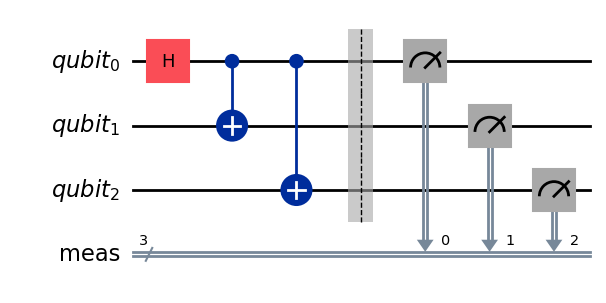

In [13]:
qc.measure_all()
qc.draw("mpl")

3. Run the circuit using `run_circuit()` does the outcome behave as expected?

In [14]:
run_circuit(qc)

{'111': 516, '000': 508}

$$\newcommand{\ketbra}[2]{\mathinner{|{#1}\rangle\,\langle{#2}|}}$$
4. Generate the operator P1 = $\ketbra{010}{010} + \ketbra{101}{101}$ using the right `np.kron` and `np.outer` and passing it to `Operator`.

In [15]:
# Basis states
zero = np.array([1, 0])
one = np.array([0, 1])

# Create |000⟩ and |111⟩
state_000 = np.kron(np.kron(zero, zero), zero)
state_111 = np.kron(np.kron(one, one), one)

# Create |010⟩ and |101⟩
state_010 = np.kron(np.kron(zero, one), zero)
state_101 = np.kron(np.kron(one, zero), one)

# Projection operator 1
proj_000 = np.outer(state_000, state_000)
proj_111 = np.outer(state_111, state_111)
proj_operator_1 = proj_000 + proj_111

# Projection operator 2
proj_010 = np.outer(state_010, state_010)
proj_101 = np.outer(state_101, state_101)
proj_operator_2 = proj_010 + proj_101

# Convert to Qiskit Operator
projection_operator_1 = Operator(proj_operator_1)
projection_operator_2 = Operator(proj_operator_2)

In [16]:
# from utils_9 import create_projection_3
# # This will be your homework
# projection_operator_3 = create_projection_3()

ModuleNotFoundError: No module named 'utils_9'

5. Calculate the expectation value of the projection operator acting on the `Statevector` produced by the circuit `qc`.

In [18]:
print(f"E of projection operator 1: {sv.expectation_value(projection_operator_1)}")
print(f"E of projection operator 2: {sv.expectation_value(projection_operator_2)}")
# print(f"E of projection operator 3: {sv.expectation_value(projection_operator_3)}")


E of projection operator 1: (0.9999999999999998+0j)
E of projection operator 2: 0j


6. Now is the time! Make a qubit-flip happen using `qc.x` on the second qubit. If you did it right, you state should now get $1/\sqrt{2}(\ket{010}+\ket{101})$

In [19]:
cq_2 = QuantumRegister(3, 'code_qubit')
qc_2 = QuantumCircuit(cq_2)
qc_2.h(cq_2[0])
qc_2.cx(cq_2[0], cq_2[1])
qc_2.cx(cq_2[0], cq_2[2])
qc_2.x(cq_2[1])
sv_flipped_2 = Statevector(qc_2)
sv_flipped_2.draw(output = 'latex')

<IPython.core.display.Latex object>

7. Calculate the expecation value of your projection operator - can it detect the error?

In [20]:
print(f"E of projection operator 1: {sv_flipped_2.expectation_value(projection_operator_1)}")
print(f"E of projection operator 2: {sv_flipped_2.expectation_value(projection_operator_2)}")
# print(f"E of projection operator 3: {sv_flipped_2.expectation_value(projection_operator_3)}")

E of projection operator 1: 0j
E of projection operator 2: (0.9999999999999998+0j)


8. Apply `qc.x` on the first qubit - this should result in a bit flip at the first qubit. If you did it right, you should get $1/\sqrt{2}(\ket{001}+\ket{110})$

In [21]:
cq_3 = QuantumRegister(3, 'code_qubit')
qc_3 = QuantumCircuit(cq_3)
qc_3.h(cq_3[0])
qc_3.cx(cq_3[0], cq_3[1])
qc_3.cx(cq_3[0], cq_3[2])
qc_3.x(cq_3[0])
sv_flipped_3 = Statevector(qc_3)
sv_flipped_3.draw(output = 'latex')

<IPython.core.display.Latex object>

9. Does the operator you constructed detect this error as well?

In [22]:
print(f"E of projection operator 1: {sv_flipped_3.expectation_value(projection_operator_1)}")
print(f"E of projection operator 2: {sv_flipped_3.expectation_value(projection_operator_2)}")
# print(f"E of projection operator 3: {sv_flipped_3.expectation_value(projection_operator_3)}")

E of projection operator 1: 0j
E of projection operator 2: 0j
